In [1]:
#Please  construct  a  new  dataset  by  either  adding  two  independent  variables  or  removing  two independent
#variables  from  finalsample.dta  dataset.  If  you  choose  to  add  two  independent variables, you could add 
#any two independent variables that you think help explain stock returns. If  you  choose  to  remove  two  
#independent  variables,  you  could  remove  any  two  independent variables that already exist in the 
#finalsample.dta dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
plt.rcParams['figure.figsize'] = [20, 15]

In [2]:
nndata=pd.read_stata('/Users/jimmyaspras/Downloads/finalsample.dta')
nndata.columns

Index(['gvkey', 'datadate', 'sic_2', 'lagdate', 'lagRet2', 'lagVOL2',
       'lagPrice2', 'lagMV2', 'lagShareturnover2', 'lagRet2_sic', 'lagRet12',
       'lagVOL12', 'lagShareturnover12', 'lagRet12_std', 'lagRet12_min',
       'lagRet12_max', 'lagRet12_sic', 'lagdatadate', 'atq', 'ceqq', 'cheq',
       'dlttq', 'epspiq', 'saleq', 'dvpspq', 'sp500_ret_d', 'nasdaq_ret_d',
       'r2000_ret_d', 'dollar_ret_d', 'VIX', 'yield_3m', 'yield_10y',
       'gdp_growth', 'Bull_ave', 'Bull_Bear', 'ret', 'debt', 'cash', 'sale',
       'BM', 'PE', 'div_p', 'loglagPrice2', 'loglagVOL12', 'loglagMV2',
       'logatq', 'loglagVOL2'],
      dtype='object')

In [3]:
nndata.sort_values(by=['datadate'], inplace=True)
nndata1=nndata[nndata['lagPrice2']>=5]#remove penny stocks
nndata1['Year']=nndata1['datadate'].dt.year
nndata1['Month']=nndata1['datadate'].dt.month
#set gvkey and datadate as the index
nndata1=nndata1.set_index(['gvkey','datadate'])
nndata1.head()

<ipython-input-3-e895412330a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nndata1['Year']=nndata1['datadate'].dt.year
<ipython-input-3-e895412330a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nndata1['Month']=nndata1['datadate'].dt.month


,,sic_2,lagdate,lagRet2,lagVOL2,lagPrice2,lagMV2,lagShareturnover2,lagRet2_sic,lagRet12,lagVOL12,...,BM,PE,div_p,loglagPrice2,loglagVOL12,loglagMV2,logatq,loglagVOL2,Year,Month
gvkey,datadate,,,,,,,,,,,,,,,,,,,,,
1004.0,2001-04-30,50.0,2001-02-28,-0.104674,1129800.0,13.600,366.27520,0.041950,-0.048423,0.052613,1481250.0,...,0.931715,85.000000,0.006250,2.610070,14.208397,5.903385,6.650203,13.937551,2001,4
30915.0,2001-04-30,33.0,2001-02-28,-0.050095,63300.0,10.050,91.80675,0.006929,0.004113,-0.018221,239500.0,...,1.624488,37.222222,0.000000,2.307573,12.386309,4.519686,5.489338,11.055641,2001,4
31170.0,2001-04-30,33.0,2001-02-28,-0.079365,296200.0,7.250,44.02925,0.048773,0.004113,-0.005784,345900.0,...,1.076057,34.523810,0.000000,1.981001,12.753905,3.784854,4.315018,12.598790,2001,4
31600.0,2001-04-30,33.0,2001-02-28,-0.035294,1058400.0,5.125,84.70600,0.064037,0.004113,0.078186,1158450.0,...,3.812655,36.607143,0.009756,1.634131,13.962593,4.439186,6.527946,13.872269,2001,4
61635.0,2001-04-30,33.0,2001-02-28,0.044444,201200.0,11.750,76.35150,0.030963,0.004113,0.318682,341450.0,...,1.379685,28.658537,0.000000,2.463853,12.740957,4.335348,5.667520,12.212055,2001,4


In [4]:
#Split  your  new  dataset  into  training  and  testing  samples.  Testing  sample  should  include  data with 
#year>=2016.
#
#Drop dvpspq and atq from the train/test data
#
train=nndata1[nndata1['Year']<2016]
X_train=train[['sic_2', 'lagRet2', 'lagVOL2',
       'lagPrice2', 'lagMV2', 'lagShareturnover2', 'lagRet2_sic', 'lagRet12',
       'lagVOL12', 'lagShareturnover12', 'lagRet12_std', 'lagRet12_min',
       'lagRet12_max', 'lagRet12_sic', 'ceqq', 'cheq',
       'dlttq', 'epspiq', 'saleq', 'sp500_ret_d', 'nasdaq_ret_d',
       'r2000_ret_d', 'dollar_ret_d', 'VIX', 'yield_3m', 'yield_10y',
       'gdp_growth', 'Bull_ave', 'Bull_Bear', 'ret', 'debt', 'cash', 'sale',
       'BM', 'PE', 'div_p', 'loglagPrice2', 'loglagVOL12', 'loglagMV2',
       'logatq', 'loglagVOL2']]

In [5]:
#Set return as the dependent training variable
Y_train=train[['ret']]

In [6]:
#Set testing independent variables
test=nndata1[nndata1['Year']>=2016]
X_test=test[['sic_2', 'lagRet2', 'lagVOL2',
       'lagPrice2', 'lagMV2', 'lagShareturnover2', 'lagRet2_sic', 'lagRet12',
       'lagVOL12', 'lagShareturnover12', 'lagRet12_std', 'lagRet12_min',
       'lagRet12_max', 'lagRet12_sic', 'ceqq', 'cheq',
       'dlttq', 'epspiq', 'saleq', 'sp500_ret_d', 'nasdaq_ret_d',
       'r2000_ret_d', 'dollar_ret_d', 'VIX', 'yield_3m', 'yield_10y',
       'gdp_growth', 'Bull_ave', 'Bull_Bear', 'ret', 'debt', 'cash', 'sale',
       'BM', 'PE', 'div_p', 'loglagPrice2', 'loglagVOL12', 'loglagMV2',
       'logatq', 'loglagVOL2']]

In [7]:
#Set return as the dependent testing variable
Y_test=test[['ret']]

In [8]:
#Calculate avg monthly risk free return
rf1=pd.read_excel("/Users/jimmyaspras/Downloads/Treasury bill.xlsx")
rf1['rf']=rf1['DGS3MO']/1200
rf2=rf1[['Date','rf']].dropna()
rf2['Year']=rf2['Date'].dt.year
rf2['Month']=rf2['Date'].dt.month
rf3=rf2[['Year','Month','rf']].groupby(['Year','Month'], as_index=False).mean()

In [9]:
#Import benchmark index return
indexret1=pd.read_stata("/Users/jimmyaspras/Downloads/Index return.dta")
#Import factors data
Factor=pd.read_excel("/Users/jimmyaspras/Downloads/Factors.xlsx")

In [10]:
#Build a neural network model. Give your own values for the number of hidden layers, epochs, batch  size,  the  
#number  of  neurons  in  each  hidden  layer,  and  other  hyperparameters.  Run permutation_importance  and  
#report  the  feature  importance  graph  (You  could  report  either  the original graph based on mean squared 
#error-MSE or the scaled graph).
def deepnetwork():
    model = Sequential()
    model.add(Dense(15, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(63, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(52, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(27, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(86, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(78, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='Adam')
    return model

In [11]:
model=KerasRegressor(build_fn=deepnetwork)
model.fit(X_train,Y_train,epochs=30,batch_size=40000,verbose=1)

Epoch 1/30
14/14 [==============================] - 5s 233ms/step - loss: 102.2800
Epoch 2/30
14/14 [==============================] - 2s 148ms/step - loss: 1.0098
Epoch 3/30
14/14 [==============================] - 4s 257ms/step - loss: 0.2463
Epoch 4/30
14/14 [==============================] - 2s 139ms/step - loss: 0.1558
Epoch 5/30
14/14 [==============================] - 2s 121ms/step - loss: 0.1606
Epoch 6/30
14/14 [==============================] - 2s 121ms/step - loss: 0.6311
Epoch 7/30
14/14 [==============================] - 2s 130ms/step - loss: 0.3205
Epoch 8/30
14/14 [==============================] - 2s 152ms/step - loss: 0.1402
Epoch 9/30
14/14 [==============================] - 5s 349ms/step - loss: 0.0334
Epoch 10/30
14/14 [==============================] - 3s 217ms/step - loss: 0.0310
Epoch 11/30
14/14 [==============================] - 4s 288ms/step - loss: 0.0239
Epoch 12/30
14/14 [==============================] - 4s 260ms/step - loss: 0.0205
Epoch 13/30
14/14 [====

In [12]:
FIM=permutation_importance(model,X_train,Y_train,n_repeats=3,scoring='neg_mean_squared_error')

In [13]:
FIM_score_mean=pd.DataFrame(FIM.importances_mean,columns=['Feature Importance'])
FIM_score_std=pd.DataFrame(FIM.importances_std,columns=['Feature Importance_std'])
FIM_score=pd.merge(FIM_score_mean,FIM_score_std,left_index=True,right_index=True)
FIM_score['Feature']=X_test.columns.tolist()
FIM_score.sort_values(by=['Feature Importance'],inplace=True)

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Feature'>

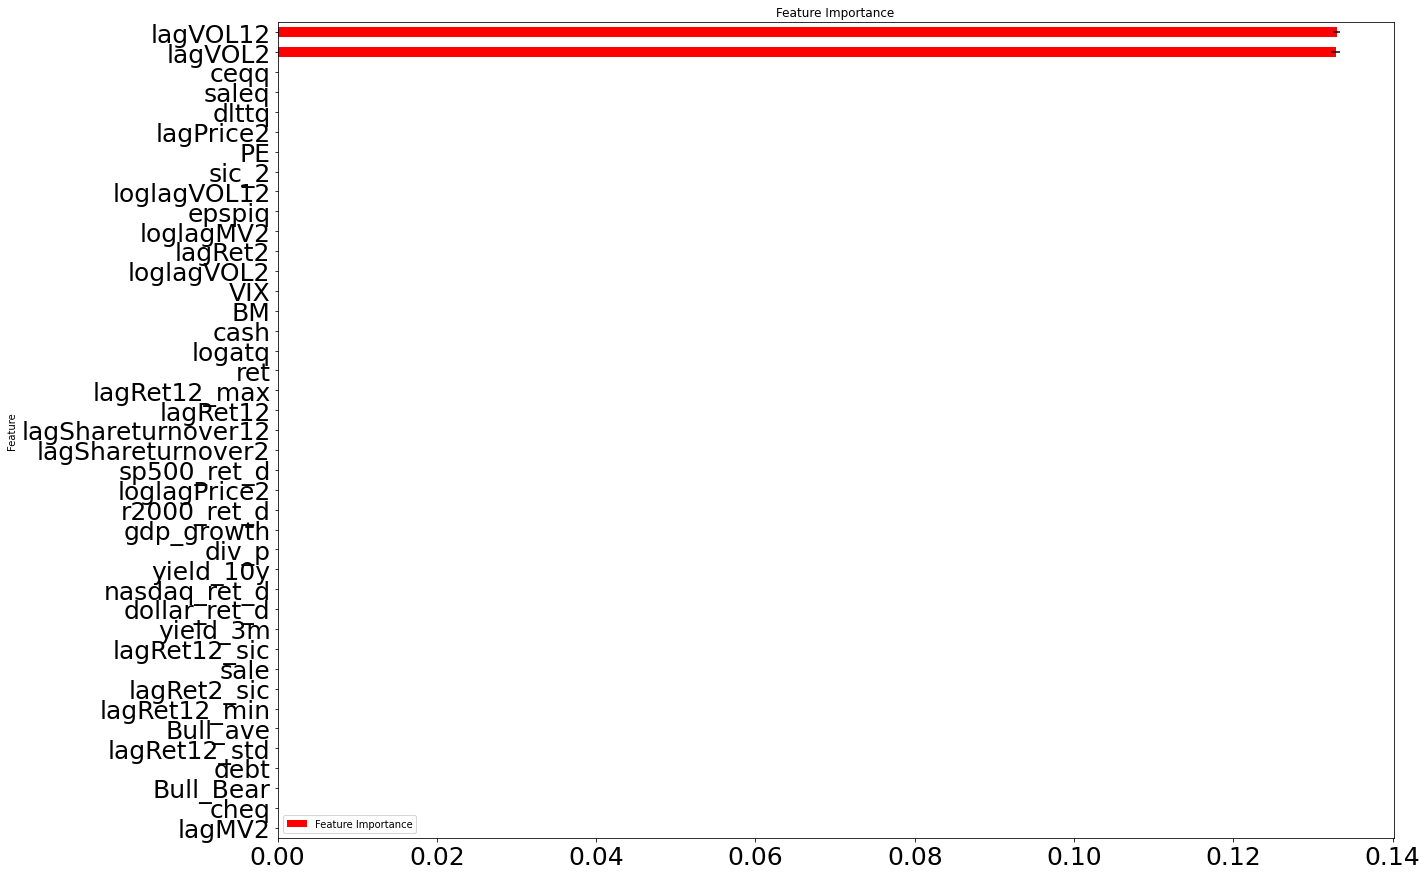

In [14]:
FIM_score.plot(kind="barh",x='Feature',y='Feature Importance',title="Feature Importance",xerr='Feature Importance_std',fontsize=25,color='red')

In [15]:
FIM_score['benchmark']=FIM_score['Feature Importance'].max()
FIM_score['Feature Importance%']=FIM_score['Feature Importance']/FIM_score['benchmark']

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Feature'>

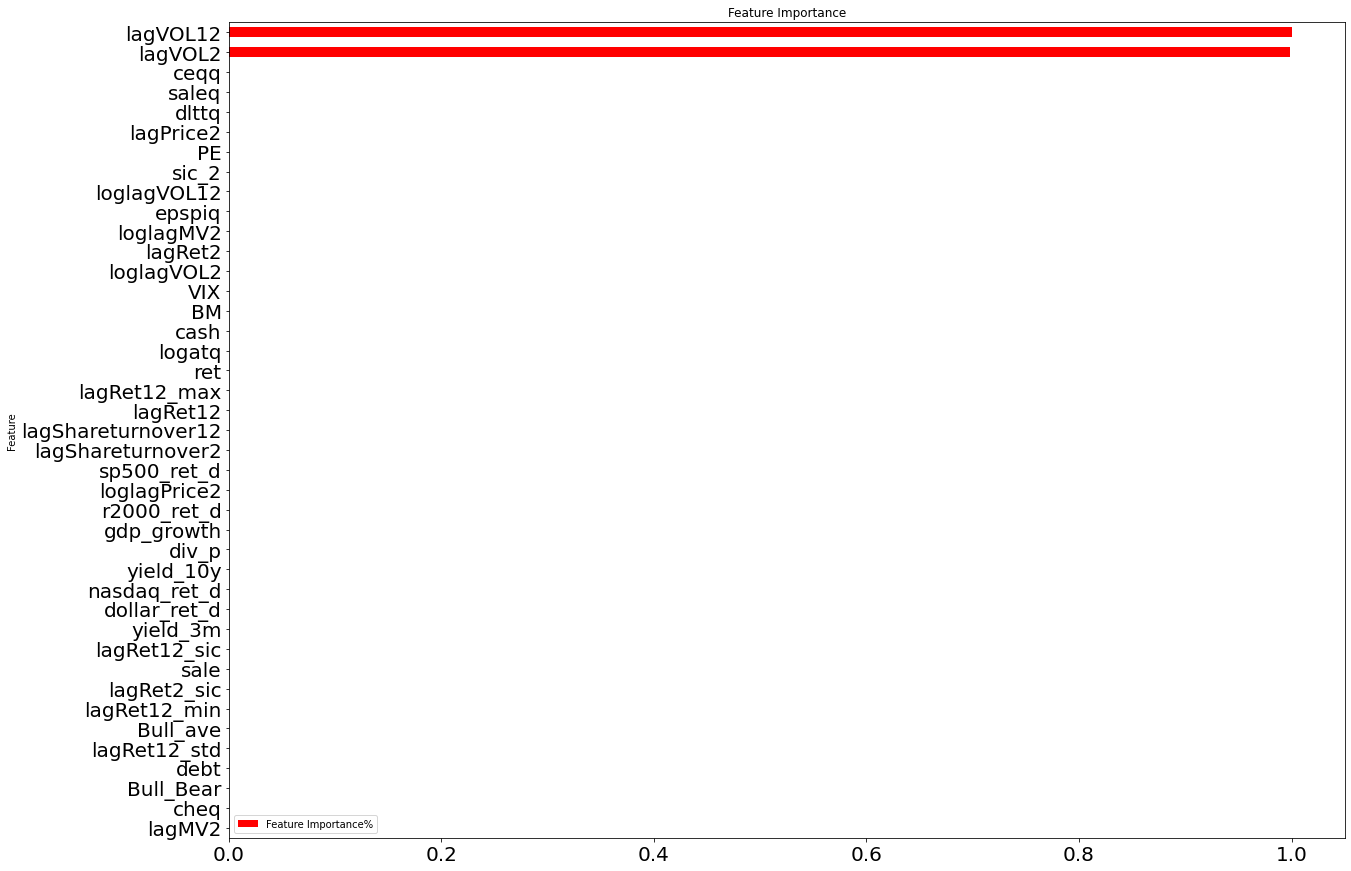

In [16]:
FIM_score.plot(kind="barh",x='Feature',y='Feature Importance%',title="Feature Importance",fontsize=20,color='red')

In [17]:
#Use Random forest, Extra tree, HistGradientBoostingRegressor, and Neural network to do the model  ensemble.  
#Give  your  own  values  for  the  hyperparameters  in  these  four  models.  Use  the average of the predictions 
#of these four models as the final prediction on stock returns. Train this model ensemble using your new training 
#sample. And use this model ensemble to predict returns based on your new testing sample. Report the average 
#return of the portfolio that consists of the 100 stocks with the highest predicted returns in each year-month. 
#Also, report the Sharpe ratio of the portfolio.  

In [18]:
#Random forest
Randomforestensemble=RandomForestRegressor(n_estimators=120,min_samples_leaf=120,bootstrap=True,
                                           max_samples=0.5,n_jobs=-1)
Randomforestensemble.fit(X_train,Y_train.values.ravel())

RandomForestRegressor(max_samples=0.5, min_samples_leaf=120, n_estimators=120,
                      n_jobs=-1)

In [19]:
#Extra tree
ExTensemble= ExtraTreesRegressor(n_estimators=120,min_samples_leaf=120,bootstrap=True,max_samples=0.5,n_jobs=-1)
ExTensemble.fit(X_train,Y_train.values.ravel())

ExtraTreesRegressor(bootstrap=True, max_samples=0.5, min_samples_leaf=120,
                    n_estimators=120, n_jobs=-1)

In [20]:
#Histgradient
HGBRensemble= HistGradientBoostingRegressor(max_iter=120,min_samples_leaf=120,early_stopping='False')     
HGBRensemble.fit(X_train,Y_train.values.ravel())

HistGradientBoostingRegressor(early_stopping='False', max_iter=120,
                              min_samples_leaf=120)

In [21]:
#Neural net
def deepnetworkensemble():
    model = Sequential()
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='Adam')
    return model

In [22]:
Deepnetworkensemble=deepnetworkensemble()
Deepnetworkensemble.fit(X_train,Y_train,epochs=25,batch_size=40000,verbose=1)

Epoch 1/25
14/14 [==============================] - 3s 115ms/step - loss: 4723.6641
Epoch 2/25
14/14 [==============================] - 2s 120ms/step - loss: 104.0704
Epoch 3/25
14/14 [==============================] - 2s 118ms/step - loss: 6.1783
Epoch 4/25
14/14 [==============================] - 2s 141ms/step - loss: 0.7560
Epoch 5/25
14/14 [==============================] - 2s 134ms/step - loss: 0.4245
Epoch 6/25
14/14 [==============================] - 2s 120ms/step - loss: 0.1436
Epoch 7/25
14/14 [==============================] - 2s 121ms/step - loss: 0.0685
Epoch 8/25
14/14 [==============================] - 2s 120ms/step - loss: 0.0585
Epoch 9/25
14/14 [==============================] - 2s 120ms/step - loss: 0.0741
Epoch 10/25
14/14 [==============================] - 2s 119ms/step - loss: 0.0578
Epoch 11/25
14/14 [==============================] - 2s 121ms/step - loss: 0.0595
Epoch 12/25
14/14 [==============================] - 2s 117ms/step - loss: 0.0738
Epoch 13/25
14/14 [=

In [23]:
#Predictions
Y_predict_Randomforestensemble=pd.DataFrame(Randomforestensemble.predict(X_test),columns=['Y_predict_Randomforestensemble'])
Y_predict_ExTensemble=pd.DataFrame(ExTensemble.predict(X_test),columns=['Y_predict_ExTensemble'])
Y_predict_HGBRensemble=pd.DataFrame(HGBRensemble.predict(X_test),columns=['Y_predict_HGBRensemble'])
Y_predict_Deepnetworkensemble=pd.DataFrame(Deepnetworkensemble.predict(X_test),columns=['Y_predict_Deepnetworkensemble'])

In [24]:
#Prediction merge
Y_predict1=pd.merge(Y_predict_HGBRensemble,Y_predict_Deepnetworkensemble,left_index=True,right_index=True)
Y_predict2=pd.merge(Y_predict1,Y_predict_ExTensemble,left_index=True,right_index=True)
Y_predict3=pd.merge(Y_predict2,Y_predict_Randomforestensemble,left_index=True,right_index=True)

In [25]:
#AVG predicted return
Y_predict3['Y_predict']=Y_predict3.mean(1)

In [26]:
#Merge predicted and actual, select 100 best performing, determine performance
Y_test1=pd.DataFrame(Y_test).reset_index()
Comb1=pd.merge(Y_test1,Y_predict3,left_index=True,right_index=True,how='inner')
Comb1['Year']=Comb1['datadate'].dt.year
Comb1['Month']=Comb1['datadate'].dt.month
rank1=Comb1[['Y_predict','Year', 'Month']].groupby(['Year','Month'],as_index=False).rank(ascending=False)
rank1.rename(columns={'Y_predict':'Y_predict_rank'},inplace=True)
stock_long1=pd.merge(Comb1,rank1,left_index=True, right_index=True)
stock_long2=stock_long1[stock_long1['Y_predict_rank']<=100]
stock_long2['datadate'].value_counts()
stock_long3=stock_long2[['ret','Year','Month']].groupby(['Year','Month']).mean()
stock_long4=pd.merge(stock_long3, rf3, left_on=['Year','Month'], right_on=['Year','Month'], how='left')
stock_long5=pd.merge(stock_long4, indexret1, left_on=['Year','Month'], right_on=['Year','Month'], how='left')
stock_long5['ret_rf']=stock_long5['ret']-stock_long5['rf']
stock_long5['ret_sp500']=stock_long5['ret']-stock_long5['sp500_ret_m']
stock_long5=sm.add_constant(stock_long5)
sm.OLS(stock_long5[['ret']],stock_long5[['const']]).fit().get_robustcov_results(cov_type='HC0').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 18 Aug 2021   Prob (F-statistic):                nan
Time:                        13:39:49   Log-Likelihood:                 31.382
No. Observations:                  64   AIC:                            -60.76
Df Residuals:                      63   BIC:                            -58.61
Df Model:                           0                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3561      0.019     19.223      0.000       0.319       0.393
==============================================================================
Omnibus:                       31.496   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.217
Skew:                           1.661   Prob(JB):                     1.87e-14
Kurtosis:                       6.560   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [27]:
#Sharpe ratio
Ret_rf=stock_long5[['ret_rf']]
SRavgensemble=(Ret_rf.mean()/Ret_rf.std())*np.sqrt(12)
SRavgensemble

ret_rf    8.223031
dtype: float64

In [28]:
#Use Random forest, Extra tree, HistGradientBoostingRegressor, and Neural network to do the model  ensemble.  
#Give  your  own  values  for  the  hyperparameters  in  the  four  models.  Choose  a linear machine learning 
#model as the final model to combine the predictions of the four models. Train this model ensemble using your new 
#training sample. And use this model ensemble to predict returns based on your new testing sample. Report the 
#average return of the portfolio that consists of the 100 stocks with the highest predicted returns in each 
#year-month. Also, report the Sharpe ratio of the portfolio. 

In [29]:
#Random forest
Randomforestensemble1=RandomForestRegressor(n_estimators=120,min_samples_leaf=120,bootstrap=True,
                                           max_samples=0.5,n_jobs=-1)
Randomforestensemble1.fit(X_train,Y_train.values.ravel())

RandomForestRegressor(max_samples=0.5, min_samples_leaf=120, n_estimators=120,
                      n_jobs=-1)

In [30]:
#Extra tree
ExTensemble1= ExtraTreesRegressor(n_estimators=120,min_samples_leaf=120,bootstrap=True,max_samples=0.5,n_jobs=-1)
ExTensemble1.fit(X_train,Y_train.values.ravel())

ExtraTreesRegressor(bootstrap=True, max_samples=0.5, min_samples_leaf=120,
                    n_estimators=120, n_jobs=-1)

In [31]:
#Histgradient
HGBRensemble1= HistGradientBoostingRegressor(max_iter=120,min_samples_leaf=120,early_stopping='False')     
HGBRensemble1.fit(X_train,Y_train.values.ravel())

HistGradientBoostingRegressor(early_stopping='False', max_iter=120,
                              min_samples_leaf=120)

In [32]:
#Neural net
def deepnetworkensemble1():
    model = Sequential()
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='Adam')
    return model

In [33]:
Deepnetworkensemble1=deepnetworkensemble1()
Deepnetworkensemble1.fit(X_train,Y_train,epochs=25,batch_size=40000,verbose=1)

Epoch 1/25
14/14 [==============================] - 4s 214ms/step - loss: 3364.5740
Epoch 2/25
14/14 [==============================] - 2s 166ms/step - loss: 77.9948
Epoch 3/25
14/14 [==============================] - 2s 165ms/step - loss: 44.6015
Epoch 4/25
14/14 [==============================] - 2s 135ms/step - loss: 26.2892
Epoch 5/25
14/14 [==============================] - 2s 133ms/step - loss: 3.9121
Epoch 6/25
14/14 [==============================] - 2s 137ms/step - loss: 3.3240
Epoch 7/25
14/14 [==============================] - 2s 135ms/step - loss: 3.2912
Epoch 8/25
14/14 [==============================] - 2s 134ms/step - loss: 1.4552
Epoch 9/25
14/14 [==============================] - 2s 133ms/step - loss: 0.2907
Epoch 10/25
14/14 [==============================] - 2s 141ms/step - loss: 0.1863
Epoch 11/25
14/14 [==============================] - 2s 141ms/step - loss: 0.1036
Epoch 12/25
14/14 [==============================] - 2s 144ms/step - loss: 0.1060
Epoch 13/25
14/14 [

In [34]:
#Predictions
Y_train_Randomforestensemble1=pd.DataFrame(Randomforestensemble1.predict(X_test),columns=['Y_predict_Randomforestensemble1'])
Y_train_ExTensemble1=pd.DataFrame(ExTensemble1.predict(X_test),columns=['Y_predict_ExTensemble1'])
Y_train_HGBRensemble1=pd.DataFrame(HGBRensemble1.predict(X_test),columns=['Y_predict_HGBRensemble1'])
Y_train_Deepnetworkensemble1=pd.DataFrame(Deepnetworkensemble1.predict(X_test),columns=['Y_predict_Deepnetworkensemble1'])

In [35]:
#Prediction merge
Y_train1=pd.merge(Y_train_HGBRensemble1,Y_train_Deepnetworkensemble1,left_index=True,right_index=True)
Y_train2=pd.merge(Y_train1,Y_train_ExTensemble1,left_index=True,right_index=True)
Y_train3=pd.merge(Y_train2,Y_train_Randomforestensemble1,left_index=True,right_index=True)
Y_train_new=pd.DataFrame(Y_train).reset_index()
Y_train4=pd.merge(Y_train3,Y_train_new,left_index=True,right_index=True)

In [36]:
tsplit=TimeSeriesSplit(n_splits=10,test_size=10000, gap=5000)

In [38]:
from sklearn.linear_model import RidgeCV

In [39]:
alpha_candidate=np.linspace(0.001,10,20)
finalmodel=RidgeCV(alphas=alpha_candidate,cv=tsplit)

In [40]:
finalmodel.fit(Y_train4[['Y_predict_HGBRensemble1','Y_predict_Deepnetworkensemble1','Y_predict_ExTensemble1',
                          'Y_predict_Randomforestensemble1']],Y_train4['ret'])

RidgeCV(alphas=array([1.00000000e-03, 5.27263158e-01, 1.05352632e+00, 1.57978947e+00,
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01]),
        cv=TimeSeriesSplit(gap=5000, max_train_size=None, n_splits=10, test_size=10000))

In [43]:
finalmodel.coef_

array([-0.00711704, -0.00213184, -0.02500874,  0.01057493])

In [44]:
#Test sample predictions
Y_predict_Randomforestensemble1=pd.DataFrame(Randomforestensemble1.predict(X_test), columns=['Y_predict_Randomforestensemble1'])
Y_predict_ExTensemble1=pd.DataFrame(ExTensemble1.predict(X_test),columns=['Y_predict_ExTensemble1'])
Y_predict_HGBRensemble1=pd.DataFrame(HGBRensemble1.predict(X_test),columns=['Y_predict_HGBRensemble1'])
Y_predict_Deepnetworkensemble1=pd.DataFrame(Deepnetworkensemble1.predict(X_test),columns=['Y_predict_Deepnetworkensemble1'])

In [45]:
#Predictions merge
Y_predict1=pd.merge(Y_predict_HGBRensemble1,Y_predict_Deepnetworkensemble1,left_index=True,right_index=True)
Y_predict2=pd.merge(Y_predict1,Y_predict_ExTensemble1,left_index=True,right_index=True)
Y_predict3=pd.merge(Y_predict2,Y_predict_Randomforestensemble1,left_index=True,right_index=True)

In [46]:
#Final predictions
Y_predict3['Y_predict']=finalmodel.predict(Y_predict3[['Y_predict_HGBRensemble1','Y_predict_Deepnetworkensemble1',
                                                       'Y_predict_ExTensemble1','Y_predict_Randomforestensemble1']])

In [47]:
#Merge predicted and actual
Y_test1=pd.DataFrame(Y_test).reset_index()
Comb1=pd.merge(Y_test1, Y_predict3, left_index=True,right_index=True,how='inner')
Comb1['Year']=Comb1['datadate'].dt.year
Comb1['Month']=Comb1['datadate'].dt.month
rank1=Comb1[['Y_predict','Year', 'Month']].groupby(['Year','Month'],as_index=False).rank(ascending=False)
rank1.rename(columns={'Y_predict':'Y_predict_rank'},inplace=True)
stock_long1=pd.merge(Comb1,rank1,left_index=True, right_index=True)
stock_long2=stock_long1[stock_long1['Y_predict_rank']<=100]
stock_long2['datadate'].value_counts()
stock_long3=stock_long2[['ret','Year','Month']].groupby(['Year','Month']).mean()
stock_long4=pd.merge(stock_long3, rf3, left_on=['Year','Month'], right_on=['Year','Month'], how='left')
stock_long5=pd.merge(stock_long4, indexret1, left_on=['Year','Month'], right_on=['Year','Month'], how='left')
stock_long5['ret_rf']=stock_long5['ret']-stock_long5['rf']
stock_long5['ret_sp500']=stock_long5['ret']-stock_long5['sp500_ret_m']
stock_long5=sm.add_constant(stock_long5)
sm.OLS(stock_long5[['ret']],stock_long5[['const']]).fit().get_robustcov_results(cov_type='HC0').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 18 Aug 2021   Prob (F-statistic):                nan
Time:                        14:27:24   Log-Likelihood:                 81.718
No. Observations:                  64   AIC:                            -161.4
Df Residuals:                      63   BIC:                            -159.3
Df Model:                           0                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2545      0.008    -30.172      0.000      -0.271      -0.238
==============================================================================
Omnibus:                       14.377   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.152
Skew:                          -1.031   Prob(JB):                     0.000311
Kurtosis:                       4.344   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [48]:
#Sharpe ratio
Ret_rf=stock_long5[['ret_rf']]
SRlinensemble=(Ret_rf.mean()/Ret_rf.std())*np.sqrt(12)
SRlinensemble

ret_rf   -12.990851
dtype: float64